In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import MaxNLocator, MultipleLocator, FuncFormatter
print("Works :)")

Works :)


In [32]:
import pandas as pd

def aggregate_time_values(file_name, chunk_size, window_size, skip_blank_lines):
    """
    Aggregates time-based data from a large CSV file into specified time intervals.

    Parameters:
        file_name (str): Path to the input CSV file.
        window_size (int): The time window size (in seconds) for aggregation.

    Returns:
        pd.Series: A Series with time intervals as the index and record counts as values.
    """
    print("Working on dataset", file_name)
    # Number of rows to process per chunk
    chunks = pd.read_csv(
        f"../data/{file_name}",
        header=0,
        names=['time'],
        dtype={'time': str},
        skip_blank_lines=skip_blank_lines,
        chunksize=chunk_size
    )

    df_list = []
    iter = 0
    
    for chunk in chunks:
        iter += 1
        chunk['time'] = chunk['time'].ffill().fillna('00:00:00.000')  # Forward fill and replace remaining NaNs
        chunk['time'] = pd.to_timedelta(chunk['time'])  # Convert to timedelta
        print(f"Total chunks: {iter * chunk_size / 1_000_000}M")
        df_list.append(chunk)
    
    df = pd.concat(df_list, ignore_index=True)  # Combine all chunks into a single DataFrame

    # Create bins based on the window size
    df['time_bin'] = (df['time'].dt.total_seconds() // window_size) * window_size

    # Count the number of records per time interval
    record_counts = df.groupby('time_bin').size()

    # Convert time_bin back to timedelta for interpretability
    record_counts.index = pd.to_timedelta(record_counts.index, unit='s')

    # Ensure every second within the range is represented
    full_range = pd.timedelta_range(start=record_counts.index.min(), 
                                    end=record_counts.index.max(), 
                                    freq=f'{window_size}S')
    record_counts = record_counts.reindex(full_range, fill_value=0)

    return record_counts


In [33]:
# Including blank lines
# record_counts_08 = aggregate_time_values("debs2022-gc-trading-day-08-11-21-timestamps.csv", 1_000_000, 1, False)
# record_counts_09 = aggregate_time_values("debs2022-gc-trading-day-09-11-21-timestamps.csv", 1_000_000, 1, False)
# record_counts_10 = aggregate_time_values("debs2022-gc-trading-day-10-11-21-timestamps.csv", 1_000_000, 1, False)
# record_counts_11 = aggregate_time_values("debs2022-gc-trading-day-11-11-21-timestamps.csv", 1_000_000, 1, False)
# record_counts_12 = aggregate_time_values("debs2022-gc-trading-day-12-11-21-timestamps.csv", 1_000_000, 1, False)

# Skipping blank lines
record_counts_08 = aggregate_time_values("debs2022-gc-trading-day-08-11-21-timestamps.csv", 1_000_000, 1, True)
record_counts_09 = aggregate_time_values("debs2022-gc-trading-day-09-11-21-timestamps.csv", 1_000_000, 1, True)
record_counts_10 = aggregate_time_values("debs2022-gc-trading-day-10-11-21-timestamps.csv", 1_000_000, 1, True)
record_counts_11 = aggregate_time_values("debs2022-gc-trading-day-11-11-21-timestamps.csv", 1_000_000, 1, True)
record_counts_12 = aggregate_time_values("debs2022-gc-trading-day-12-11-21-timestamps.csv", 1_000_000, 1, True)


Working on dataset debs2022-gc-trading-day-08-11-21-timestamps.csv
Total chunks: 1.0M
Total chunks: 2.0M
Total chunks: 3.0M
Total chunks: 4.0M
Total chunks: 5.0M
Total chunks: 6.0M
Total chunks: 7.0M
Total chunks: 8.0M
Total chunks: 9.0M
Total chunks: 10.0M
Total chunks: 11.0M
Total chunks: 12.0M
Total chunks: 13.0M
Total chunks: 14.0M
Total chunks: 15.0M
Total chunks: 16.0M
Total chunks: 17.0M
Total chunks: 18.0M
Total chunks: 19.0M
Total chunks: 20.0M
Total chunks: 21.0M
Total chunks: 22.0M
Total chunks: 23.0M
Total chunks: 24.0M
Total chunks: 25.0M
Total chunks: 26.0M
Total chunks: 27.0M
Total chunks: 28.0M


/var/folders/j3/5xj22ydj1md8pxlz965qc3_r0000gn/T/ipykernel_76226/3973174067.py:47: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.timedelta_range(start=record_counts.index.min(),


Working on dataset debs2022-gc-trading-day-09-11-21-timestamps.csv
Total chunks: 1.0M
Total chunks: 2.0M
Total chunks: 3.0M
Total chunks: 4.0M
Total chunks: 5.0M
Total chunks: 6.0M
Total chunks: 7.0M
Total chunks: 8.0M
Total chunks: 9.0M
Total chunks: 10.0M
Total chunks: 11.0M
Total chunks: 12.0M
Total chunks: 13.0M
Total chunks: 14.0M
Total chunks: 15.0M
Total chunks: 16.0M
Total chunks: 17.0M
Total chunks: 18.0M
Total chunks: 19.0M
Total chunks: 20.0M
Total chunks: 21.0M
Total chunks: 22.0M
Total chunks: 23.0M
Total chunks: 24.0M
Total chunks: 25.0M
Total chunks: 26.0M
Total chunks: 27.0M
Total chunks: 28.0M
Total chunks: 29.0M


/var/folders/j3/5xj22ydj1md8pxlz965qc3_r0000gn/T/ipykernel_76226/3973174067.py:47: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.timedelta_range(start=record_counts.index.min(),


Working on dataset debs2022-gc-trading-day-10-11-21-timestamps.csv
Total chunks: 1.0M
Total chunks: 2.0M
Total chunks: 3.0M
Total chunks: 4.0M
Total chunks: 5.0M
Total chunks: 6.0M
Total chunks: 7.0M
Total chunks: 8.0M
Total chunks: 9.0M
Total chunks: 10.0M
Total chunks: 11.0M
Total chunks: 12.0M
Total chunks: 13.0M
Total chunks: 14.0M
Total chunks: 15.0M
Total chunks: 16.0M
Total chunks: 17.0M
Total chunks: 18.0M
Total chunks: 19.0M
Total chunks: 20.0M
Total chunks: 21.0M
Total chunks: 22.0M
Total chunks: 23.0M
Total chunks: 24.0M
Total chunks: 25.0M
Total chunks: 26.0M
Total chunks: 27.0M
Total chunks: 28.0M
Total chunks: 29.0M
Total chunks: 30.0M
Total chunks: 31.0M


/var/folders/j3/5xj22ydj1md8pxlz965qc3_r0000gn/T/ipykernel_76226/3973174067.py:47: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.timedelta_range(start=record_counts.index.min(),


Working on dataset debs2022-gc-trading-day-11-11-21-timestamps.csv
Total chunks: 1.0M
Total chunks: 2.0M
Total chunks: 3.0M
Total chunks: 4.0M
Total chunks: 5.0M
Total chunks: 6.0M
Total chunks: 7.0M
Total chunks: 8.0M
Total chunks: 9.0M
Total chunks: 10.0M
Total chunks: 11.0M
Total chunks: 12.0M
Total chunks: 13.0M
Total chunks: 14.0M
Total chunks: 15.0M
Total chunks: 16.0M
Total chunks: 17.0M
Total chunks: 18.0M
Total chunks: 19.0M
Total chunks: 20.0M
Total chunks: 21.0M
Total chunks: 22.0M
Total chunks: 23.0M
Total chunks: 24.0M
Total chunks: 25.0M
Total chunks: 26.0M
Total chunks: 27.0M
Total chunks: 28.0M


/var/folders/j3/5xj22ydj1md8pxlz965qc3_r0000gn/T/ipykernel_76226/3973174067.py:47: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.timedelta_range(start=record_counts.index.min(),


Working on dataset debs2022-gc-trading-day-12-11-21-timestamps.csv
Total chunks: 1.0M
Total chunks: 2.0M
Total chunks: 3.0M
Total chunks: 4.0M
Total chunks: 5.0M
Total chunks: 6.0M
Total chunks: 7.0M
Total chunks: 8.0M
Total chunks: 9.0M
Total chunks: 10.0M
Total chunks: 11.0M
Total chunks: 12.0M
Total chunks: 13.0M
Total chunks: 14.0M
Total chunks: 15.0M
Total chunks: 16.0M
Total chunks: 17.0M
Total chunks: 18.0M
Total chunks: 19.0M
Total chunks: 20.0M
Total chunks: 21.0M
Total chunks: 22.0M
Total chunks: 23.0M
Total chunks: 24.0M
Total chunks: 25.0M
Total chunks: 26.0M
Total chunks: 27.0M
Total chunks: 28.0M


/var/folders/j3/5xj22ydj1md8pxlz965qc3_r0000gn/T/ipykernel_76226/3973174067.py:47: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.timedelta_range(start=record_counts.index.min(),


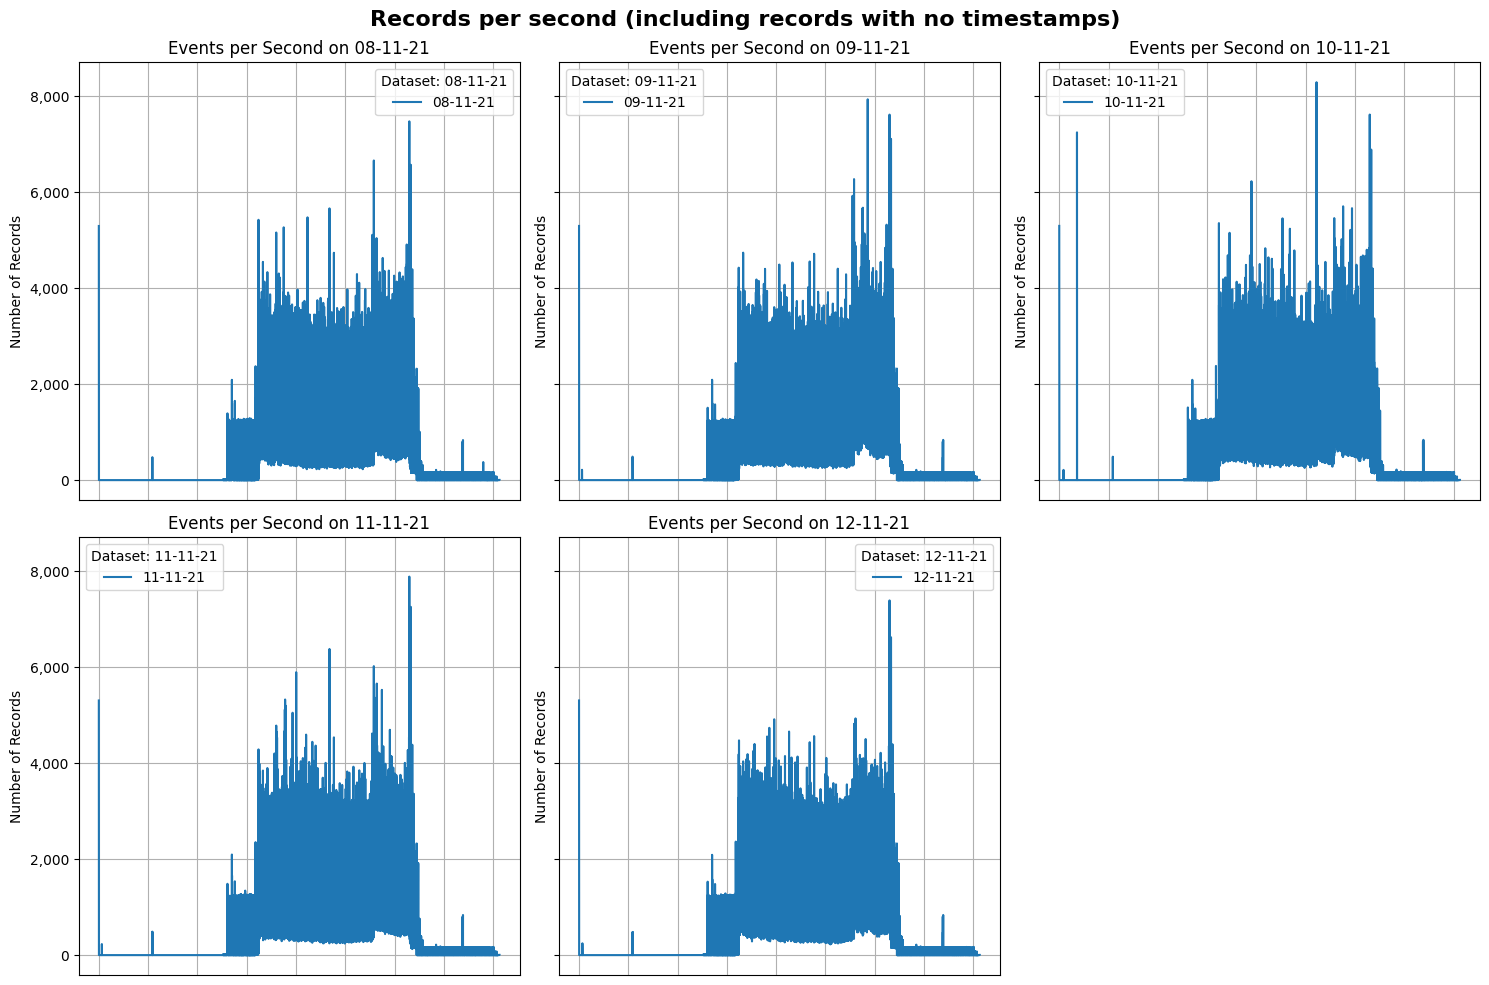

In [ ]:
def plot_datasets_in_subplots(datasets, labels, window_size=1):
    """
    Plots multiple datasets in separate subplots within the same figure.

    Args:
    - datasets (list of pd.Series): List of Series containing record counts indexed by time in timedelta format.
    - labels (list of str): Labels for each dataset.
    - window_size (int): Time window size in seconds for aggregation (used for title).
    """
    num_datasets = len(datasets)
    rows, cols = 2, 3  # Define a 2x3 grid for subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=True, sharey=True)
    
    axes = axes.flatten()  # Flatten for easy iteration

    # Ensure grid is applied on all axes
    for ax in axes:
        ax.grid(True)

    for i, (record_counts, label) in enumerate(zip(datasets, labels)):
        ax = axes[i]

        # Plot the data with no timestamps on x-axis, just using data points
        ax.plot(record_counts.index, record_counts.values, label=label)

        ax.set_title(f'Events per Second on {label}')
        ax.set_ylabel('Number of Records')
        ax.legend(title=f"Dataset: {label}")
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Hide unused subplots in case there are fewer than 6 datasets
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Records per second (excluding records with no timestamps)', fontsize=16, fontweight='bold')

    # Adjust layout for better spacing between subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    plt.tight_layout()
    # Show the plot
    plt.show()

# Example usage
plot_datasets_in_subplots(
    [record_counts_08, record_counts_09, record_counts_10, record_counts_11, record_counts_12], 
    labels=['08-11-21', '09-11-21', '10-11-21', '11-11-21', '12-11-21'], 
    window_size=1
)

In [35]:
print(record_counts_08.head(100).to_string())

0 days 00:00:00    5296
0 days 00:00:01       0
0 days 00:00:02       0
0 days 00:00:03       0
0 days 00:00:04       0
0 days 00:00:05       0
0 days 00:00:06       0
0 days 00:00:07       0
0 days 00:00:08       0
0 days 00:00:09       0
0 days 00:00:10       0
0 days 00:00:11       0
0 days 00:00:12       0
0 days 00:00:13       0
0 days 00:00:14       0
0 days 00:00:15       0
0 days 00:00:16       0
0 days 00:00:17       0
0 days 00:00:18       0
0 days 00:00:19       0
0 days 00:00:20       0
0 days 00:00:21       0
0 days 00:00:22       0
0 days 00:00:23       0
0 days 00:00:24       0
0 days 00:00:25       0
0 days 00:00:26       0
0 days 00:00:27       0
0 days 00:00:28       0
0 days 00:00:29       0
0 days 00:00:30       0
0 days 00:00:31       0
0 days 00:00:32       0
0 days 00:00:33       0
0 days 00:00:34       0
0 days 00:00:35       0
0 days 00:00:36       0
0 days 00:00:37       0
0 days 00:00:38       0
0 days 00:00:39       0
0 days 00:00:40       0
0 days 00:00:41 